# Classification with stumbleupon data

Project 4 has been changed since scraping was untenable. The project now focuses on the stumbleupon kaggle dataset. For more information on this dataset, [check out the website here](https://www.kaggle.com/c/stumbleupon).

---

## 1. Load in the dataset

This is the only part completed for you.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
su = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t')
su.head(3)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1


## DATA DICTIONARY

|Title|Description|Type|
|------|------|-------|
|url|url link of the webpage|string|
|urlid|StumbleUpon's unique ID for the url| integer|
|boilerplate|boilerplate text|json|
|alchemy_category||string|
|alchemy_category_score||string|
|avglinksize|average number of words in each link|float|
|commonLinkRatio_1|# of links sharing at least 1 word with 1 other links / # of links|float|
|commonLinkRatio_2|# of links sharing at least 1 word with 2 other links / # of links|float|
|commonLinkRatio_3|# of links sharing at least 1 word with 3 other links / # of links|float|
|commonLinkRatio_4|# of links sharing at least 1 word with 4 other links / # of links|float|
|compression_ratio|Compression achieved on this page via gzip (measure of redundancy)|float|
|embed_ratio|Count of number of <embed>  usage|float|
|frameBased|A page is frame-based (1) if it has no body markup but have a frameset markup|integer|
|frameTagRatio|Ratio of iframe markups over total number of markups|float|
|hasDomainLink|True (1) if it contains an <a>  with an url with domain|integer|
|html_ratio|Ratio of tags vs text in the page|float|
|image_ratio|Ratio of <img> tags vs text in the page|float|
|is_news|True (1) if StumbleUpon's news classifier determines that this webpage is news|string|
|lengthyLinkDomain|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters|integer|
|linkwordscore|Percentage of words on the page that are in hyperlink's text|integer|
|news_front_page|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news|string|
|non_markup_alphanum_characters|Page's text's number of alphanumeric characters|integer|
|numberOfLinks|Number of <a>  markups|integer|
|numwords_in_url|Number of words in url|integer|
|parametrizedLinkRatio|A link is parametrized if it's url contains parameters  or has an attached onClick event|float|
|spelling_errors_ratio|Ratio of words not found in wiki (considered to be a spelling mistake)|float|
|label|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only|integer|

## 2. Clean up/examine your data

Some of the columns may have values that need changing or that are of the wrong type. There could also be columns that aren't very useful.

---

In [3]:
su.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category',
       u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'framebased', u'frameTagRatio',
       u'hasDomainLink', u'html_ratio', u'image_ratio', u'is_news',
       u'lengthyLinkDomain', u'linkwordscore', u'news_front_page',
       u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url',
       u'parametrizedLinkRatio', u'spelling_errors_ratio', u'label'],
      dtype='object')

In [4]:
su.info()
print su.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

In [5]:
# print su['alchemy_category'].value_counts()
# print su['is_news'].value_counts()
# print su['alchemy_category_score'].value_counts()
# print su['news_front_page'].value_counts()

In [6]:
# replace ? with NaN or 0
su['alchemy_category_score'] = su['alchemy_category_score'].replace('?', np.nan)
su['is_news'] = su['is_news'].replace('?', 0)
su['news_front_page'] = su['news_front_page'].replace('?',2)

#print su.isnull().sum()
# drop NaN
sudata = su.dropna()

# change category score into float
sudata.alchemy_category_score = sudata.alchemy_category_score.astype(float, inplace=True)

//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2698: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
sudata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5053 entries, 0 to 7393
Data columns (total 27 columns):
url                               5053 non-null object
urlid                             5053 non-null int64
boilerplate                       5053 non-null object
alchemy_category                  5053 non-null object
alchemy_category_score            5053 non-null float64
avglinksize                       5053 non-null float64
commonlinkratio_1                 5053 non-null float64
commonlinkratio_2                 5053 non-null float64
commonlinkratio_3                 5053 non-null float64
commonlinkratio_4                 5053 non-null float64
compression_ratio                 5053 non-null float64
embed_ratio                       5053 non-null float64
framebased                        5053 non-null int64
frameTagRatio                     5053 non-null float64
hasDomainLink                     5053 non-null int64
html_ratio                        5053 non-null float64
image_

In [8]:
sudata.alchemy_category.value_counts()

recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

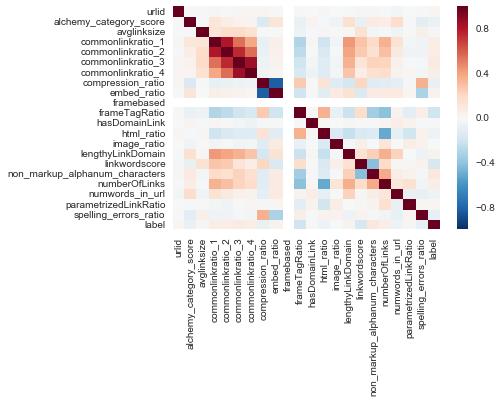

In [9]:
sns.heatmap(sudata.corr())

In [10]:
# delete framebased sudata

del sudata['framebased']
#del sudata['hasDomainLink']
sudata.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category',
       u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'frameTagRatio',
       u'hasDomainLink', u'html_ratio', u'image_ratio', u'is_news',
       u'lengthyLinkDomain', u'linkwordscore', u'news_front_page',
       u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url',
       u'parametrizedLinkRatio', u'spelling_errors_ratio', u'label'],
      dtype='object')

In [11]:
sudata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5053 entries, 0 to 7393
Data columns (total 26 columns):
url                               5053 non-null object
urlid                             5053 non-null int64
boilerplate                       5053 non-null object
alchemy_category                  5053 non-null object
alchemy_category_score            5053 non-null float64
avglinksize                       5053 non-null float64
commonlinkratio_1                 5053 non-null float64
commonlinkratio_2                 5053 non-null float64
commonlinkratio_3                 5053 non-null float64
commonlinkratio_4                 5053 non-null float64
compression_ratio                 5053 non-null float64
embed_ratio                       5053 non-null float64
frameTagRatio                     5053 non-null float64
hasDomainLink                     5053 non-null int64
html_ratio                        5053 non-null float64
image_ratio                       5053 non-null float64
is_n

In [12]:
sudata.label.value_counts()

1    2620
0    2433
Name: label, dtype: int64

## 3. Use statsmodels' logistic regression function to look at variable significance

The **`import statsmodels.formula.api as smf`** code below gives us access to a statsmodels api that can run logistic regressions using patsy-style formulas.

Ex:

```python
formula = 'target ~ var1 + var2 + C(var3) -1'
logreg = smf.logit(formula, data=data)
logreg_results = logreg.fit()
print logreg_results.summary()
```

---

In [13]:
import statsmodels.formula.api as smf
import patsy

### 3.1 Run a logistic regression predicting evergreen from the numeric columns

And print out the results as shown in the example above.

---

In [14]:
formula1 = '''
label ~ 
alchemy_category_score +
avglinksize +
commonlinkratio_1 +
commonlinkratio_2 +
commonlinkratio_3 + 
commonlinkratio_4 +
compression_ratio +
embed_ratio +
frameTagRatio +
html_ratio +
image_ratio +
is_news +
lengthyLinkDomain +
linkwordscore +
non_markup_alphanum_characters +
numberOfLinks +
numwords_in_url +
parametrizedLinkRatio +
spelling_errors_ratio +
-1
'''

# logit function

logreg = smf.logit(formula1, data=sudata)
logreg_results = logreg.fit()
print logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.645481
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 5053
Model:                          Logit   Df Residuals:                     5033
Method:                           MLE   Df Model:                           19
Date:                Mon, 16 May 2016   Pseudo R-squ.:                 0.06785
Time:                        21:25:56   Log-Likelihood:                -3261.6
converged:                       True   LL-Null:                       -3499.0
                                        LLR p-value:                 1.073e-88
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                          1.9378      0.244      7.943     

### 3.2 Run a logistic regression predicting evergreen from the numeric columns and a categorical variable of alchemy_category

And print out the results as shown in the example.

---

In [15]:
formula2 = '''
label ~ 
alchemy_category +
alchemy_category_score +
avglinksize +
commonlinkratio_1 +
commonlinkratio_2 +
commonlinkratio_3 +
commonlinkratio_4 +
compression_ratio +
embed_ratio +
frameTagRatio +
html_ratio +
image_ratio +
is_news +
lengthyLinkDomain +
linkwordscore +
non_markup_alphanum_characters +
numberOfLinks +
numwords_in_url +
parametrizedLinkRatio +
spelling_errors_ratio +
-1
'''

logreg = smf.logit(formula2, data=sudata)
logreg_results = logreg.fit()
print logreg_results.summary()

         Current function value: 0.595021
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 5053
Model:                          Logit   Df Residuals:                     5021
Method:                           MLE   Df Model:                           31
Date:                Mon, 16 May 2016   Pseudo R-squ.:                  0.1407
Time:                        21:25:56   Log-Likelihood:                -3006.6
converged:                      False   LL-Null:                       -3499.0
                                        LLR p-value:                4.928e-187
                                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.8516      0.267      3.188      0.001      

//anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## 4. Use sklearn to cross-validate the accuracy of the model above

Normalize the numeric and categorical columns of the predictor matrix.

---

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [17]:
# Normalize everything except within the below columns

normalized = [x for x in sudata if x not in ['url','urlid',
               'boilerplate','alchemy_category','news_front_page','is_news','label']]

sudata_norm = sudata.copy()

sudata_norm.ix[:,normalized] = sudata_norm.ix[:,normalized] - sudata_norm.ix[:,normalized].mean() / sudata_norm.ix[:,normalized].std()

In [18]:
sudata_norm.columns

Index([u'url', u'urlid', u'boilerplate', u'alchemy_category',
       u'alchemy_category_score', u'avglinksize', u'commonlinkratio_1',
       u'commonlinkratio_2', u'commonlinkratio_3', u'commonlinkratio_4',
       u'compression_ratio', u'embed_ratio', u'frameTagRatio',
       u'hasDomainLink', u'html_ratio', u'image_ratio', u'is_news',
       u'lengthyLinkDomain', u'linkwordscore', u'news_front_page',
       u'non_markup_alphanum_characters', u'numberOfLinks', u'numwords_in_url',
       u'parametrizedLinkRatio', u'spelling_errors_ratio', u'label'],
      dtype='object')

In [19]:
# logistic regression / validation
Y, X = patsy.dmatrices(formula2, data=sudata_norm)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30)
lg = LogisticRegression()
lg.fit(X_train, Y_train)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
lg.predict(X_test)
print lg.score(X_test, Y_test)

0.666226912929


## 5. Gridsearch regularization parameters for logistic regression

Find the best regularization type (Ridge, Lasso) across a set of regularization strengths.

[NOTE: C is the inverse of the regularization strength. Lower C values are stronger regularization. Having a C higher than 1 will significantly slow down the search. I'm not particularly interested in values over 1, since this is the default regularization strength in LogisticRegression.]

**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

[NOTE 2: to run Lasso regularization the solver should be `'liblinear'`]

---

In [21]:
from sklearn.grid_search import GridSearchCV

In [22]:
Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {
    "penalty":             ['l1','l2'],        # Used to specify the norm used in the penalization.
    "C":                   Cs,                 # Regularization paramter
    "fit_intercept":       [False, True],      # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    "class_weight":        [None, "balanced"], # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
    "intercept_scaling":   [2, 1],             # Useful only if solver is liblinear. when self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector. 
    "solver":              ['liblinear'],      # Set the solver to be liblinear
    # Because LibLinear solver is being used the warm start is not needed
}
estimator = GridSearchCV(lg, search_parameters)

Y = sudata_norm['label']
X = sudata_norm.ix[:, 4:]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30)

In [23]:
X.head()

,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,frameTagRatio,hasDomainLink,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,-2.045236,1.765373,-1.655651,-1.276597,-0.933189,-0.670559,0.108529,0.25148,-1.289152,-0.13915,...,1,-0.433392,22.504032,0,5423.226119,168.843461,6.452798,-0.816480,-1.530163,0
1,-2.260220,3.387784,-1.824100,-1.193710,-0.766344,-0.549703,0.133395,0.25148,-1.281219,-0.13915,...,1,-0.433392,38.504032,0,4972.226119,185.843461,7.452798,-0.787603,-1.483844,1
2,-1.837841,2.092701,-1.770106,-1.160774,-0.860093,-0.651452,0.190194,0.25148,-1.307478,-0.13915,...,1,-0.433392,53.504032,0,2239.226119,256.843461,9.452798,-0.802755,-1.551679,1
3,-2.033119,1.252921,-1.932122,-1.382480,-0.963581,-0.694088,0.145471,0.25148,-1.284065,-0.13915,...,1,-1.433392,22.504032,0,2736.226119,118.843461,3.452798,-0.927755,-1.508434,1
4,-2.115210,2.386289,-1.832122,-1.260257,-0.856791,-0.650878,0.110889,0.25148,-1.355017,-0.13915,...,1,-0.433392,12.504032,0,12031.226119,160.843461,8.452798,-0.870656,-1.526723,0


In [24]:
grid = estimator.fit(X_train, Y_train)

grid.grid_scores_

[mean: 1.00000, std: 0.00000, params: {'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None},
 mean: 0.99943, std: 0.00080, params: {'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None},
 mean: 1.00000, std: 0.00000, params: {'C': 1.0, 'intercept_scaling': 1, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None},
 mean: 0.99972, std: 0.00040, params: {'C': 1.0, 'intercept_scaling': 1, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None},
 mean: 1.00000, std: 0.00000, params: {'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': True, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None},
 mean: 1.00000, std: 0.00000, params: {'C': 1.0, 'intercept_scaling': 2, 'fit_intercept': True, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None},
 mean: 1.00000, std: 0.00000, params: {'C'

## 6. Gridsearch neighbors for kNN

Find the best number of neighbors with your predictors to predict the `label` target variable.

Start by bulding a kNN model with a set number of neighbors, then use gridsearch to run through a series of neighbors.

---

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Setup our GridSearch Parmaters
search_parameters = {
    'n_neighbors':  [3,125], 
    'weights':      ("uniform", "distance"),
    'algorithm':    ("ball_tree", "kd_tree", "brute", "auto"),
    'p':            [1,2]
}

In [26]:
x_train, x_test, y_train, y_test = (train_test_split(X, Y, test_size = 0.3))


# Intialize KNN 
knn = KNeighborsClassifier()

print knn.fit(x_train,y_train)
print knn.score(x_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
0.562664907652


In [27]:
# Intialize GridSearchCV
knn_grid= GridSearchCV(knn, search_parameters)
knn_grid.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 125], 'weights': ('uniform', 'distance'), 'algorithm': ('ball_tree', 'kd_tree', 'brute', 'auto'), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [28]:
print "Best Estimator:", knn_grid.best_estimator_.n_neighbors
print "Best Params:", knn_grid.best_params_
print "Best Score:", knn_grid.best_score_

Best Estimator: 125
Best Params: {'n_neighbors': 125, 'weights': 'distance', 'algorithm': 'ball_tree', 'p': 1}
Best Score: 0.605032513429


## 7. Choose a new target from alchemy_category to predict with logistic regression

**Ideally your category choice will have a small fraction of the total rows, but not TOO small!**

---

### 7.1 Chose your target category, create the Y vector, and check the fraction of instances

---

In [29]:
sudata2 = sudata.copy()

In [30]:
sudata2['sport'] = sudata2.alchemy_category.map(lambda x: 1 if x == 'sports' else 0)

In [31]:
float(len(sudata2[sudata2['sport']==1])) / len(sudata2)

0.07520284979220265

### 7.2 Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them

Ex:

```python
import patsy

formula_interactions = '~ (var1 + var2 + var3)**2 -1'
X_interactions = patsy.dmatrix(formula_interactions, data=data
```

Get the column names from the `design_info` property of the patsy X matrix.

---

In [32]:
formula_interactions = """
~ (avglinksize + 
alchemy_category_score + 
commonlinkratio_1 + 
commonlinkratio_2 + 
commonlinkratio_3 + 
commonlinkratio_4 + 
compression_ratio + 
embed_ratio + 
frameTagRatio + 
hasDomainLink + 
html_ratio + 
image_ratio + 
linkwordscore + 
non_markup_alphanum_characters + 
numberOfLinks + 
numwords_in_url + 
parametrizedLinkRatio + 
spelling_errors_ratio)**2
"""
X_interactions = patsy.dmatrix(formula_interactions, data = sudata2)

In [33]:
X_interactions.design_info

DesignInfo(['Intercept',
            'avglinksize',
            'alchemy_category_score',
            'commonlinkratio_1',
            'commonlinkratio_2',
            'commonlinkratio_3',
            'commonlinkratio_4',
            'compression_ratio',
            'embed_ratio',
            'frameTagRatio',
            'hasDomainLink',
            'html_ratio',
            'image_ratio',
            'linkwordscore',
            'non_markup_alphanum_characters',
            'numberOfLinks',
            'numwords_in_url',
            'parametrizedLinkRatio',
            'spelling_errors_ratio',
            'avglinksize:alchemy_category_score',
            'avglinksize:commonlinkratio_1',
            'avglinksize:commonlinkratio_2',
            'avglinksize:commonlinkratio_3',
            'avglinksize:commonlinkratio_4',
            'avglinksize:compression_ratio',
            'avglinksize:embed_ratio',
            'avglinksize:frameTagRatio',
            'avglinksize:hasDomainLink',
  

### 7.3 Normalize the predictor matrix columns

---

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_sudata2 = scaler.fit_transform(X_interactions)

X_sudata2

array([[ 0.        , -0.0874052 ,  0.87292916, ...,  0.39900846,
         0.40483419, -0.18845354],
       [ 0.        ,  0.07266537, -0.13713086, ...,  0.80765693,
         1.67538071,  0.24073594],
       [ 0.        , -0.05511037,  1.84733377, ...,  1.00262954,
         0.40664847, -0.28866901],
       ..., 
       [ 0.        , -0.0723594 , -2.16786439, ..., -0.73292662,
        -0.09525743, -0.58583646],
       [ 0.        , -0.09288643, -1.91249751, ...,  1.33692467,
         0.29007081,  1.37417839],
       [ 0.        , -0.18895223,  0.06832124, ..., -0.81211549,
        -1.21675751, -0.32195151]])

In [37]:
Y = np.ravel(sudata2.sport)
Y.shape

(5053,)

### 7.4 Gridsearch a logistic regression to predict accuracy on your new target from the interaction predictors

Include Ridge and Lasso.

---

In [42]:
Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {
    "penalty":             ['l1','l2'],        # Used to specify the norm used in the penalization.
    "C":                   Cs,                 # Regularization paramter
    "fit_intercept":       [False, True],      # Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
    "class_weight":        [None, "balanced"], # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
    "intercept_scaling":   [2, 1],             # Useful only if solver is liblinear. when self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector. 
    "solver":              ['liblinear'],      # Set the solver to be liblinear
    # Because LibLinear solver is being used the warm start is not needed
}


X_train, X_test, Y_train, Y_test = train_test_split(X_sudata2, Y, test_size=0.3)

estimator = GridSearchCV(lg, search_parameters)
estimator.fit(X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
print "Best Params: ", estimator.best_estimator_
print "Best Score:", estimator.best_score_

### 7.5 Build a logistic regression with the optimal parameters, and look at the coefficients

---

### 7.6 Gridsearch parameters for a logistic regression with the same target and predictors, but score based on precision rather than accuracy

Look at the documentation.

---

In [43]:
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sudata2, Y, test_size=0.3)

estimator = GridSearchCV(lg,                       # Repeat same model
                       search_parameters,             # Repeat above search parameters
                       scoring='precision')  # Weight towards precision

estimator.fit(X_train, Y_train)

## [BONUS] 8. Build models predicting from words

This is a bit of the NLP we covered in the pipeline lecture!

---

### 8.1 Choose 'body' or 'title' from the boilerplate to be the basis of your word predictors

You will need to parse the json from the boilerplate field.

---

In [ ]:
import json

### 8.2 Use CountVectorizer to create your predictor matrix from the string column

It is up to you what range of ngrams and features, and whether or not you want the columns binary or counts.

---

### 8.3 Gridsearch a logistic regression predicting accuracy of your chosen target category from word predictor matrix

---

### 8.4 Do the same as above, but score the gridsearch based on precision rather than accuracy

---

### 8.5 Build a logistic regression with optimal precision categories

Print out the top 20 or 25 word features as ranked by their coefficients.

---